In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
import datetime
from datetime import date
from statsmodels.tsa.stattools import adfuller, kpss
%matplotlib inline

In [2]:
aapl = yf.Ticker("aapl")

## Check stationarity
### Plot an initial time series
##### Reference
##### Chaudhari, S. (2021). Stationarity in time series analysis explained using Python. Mathematics and Econometrics. https://blog.quantinsti.com/stationarity

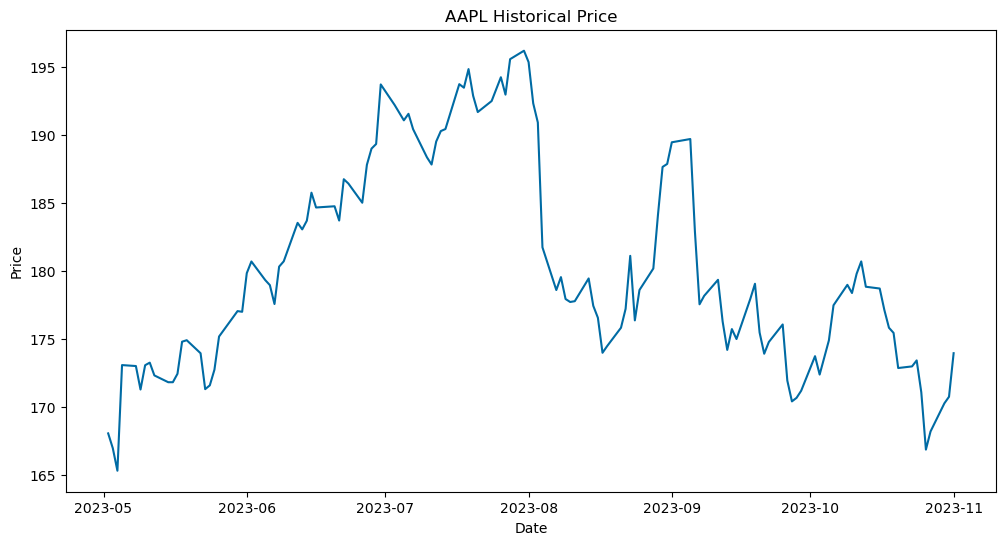

In [3]:
plt.style.use('tableau-colorblind10') #https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.figure(figsize=(12, 6))
plt.plot(aapl.history(period='6mo')['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Historical Price')
plt.show()

### Split Price into halves for statistical analysis

In [4]:
X = aapl.history(period='6mo')['Close']
split = round(len(X)/2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
mean_percent_diff = (mean2 - mean1) / mean1 * 100
var1, var2 = X1.var(), X2.var()
var_percent_diff = (var2 - var1) / var1 * 100
print('mean1=%f, mean2=%3f, mean_percent_diff=%f' % (mean1, mean2, mean_percent_diff))
print('variance1=%f, variance2=%f, var_percent_diff=%f' % (var1, var2, var_percent_diff))

mean1=183.074507, mean2=177.062545, mean_percent_diff=-3.283888
variance1=77.235943, variance2=24.405572, var_percent_diff=-68.401276


Means are not constant and variances differ significantly. Therefore, series is not stationary.

### Augmented Dickey-Fuller Test
##### Check for stationarity where H0 = time series !stationary; H1 = time series = stationary
##### If p-value <= .05 or abs(test statistic)>critical value, reject H0

In [5]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print(result[4])

ADF Statistic: -2.250306
p-value: 0.188496
Critical Values:
{'1%': -3.4833462346078936, '5%': -2.8847655969877666, '10%': -2.5791564575459813}


##### P-value > .05; therefore, time series is not stationary (as expected).
##### abs(ADF Statistic) < abs(critical value) -> fail to reject H0
##### Therefore: Time series is not stationary for p-values .01, .05, and .1

### Kwiatkowski-Phillips-Schmidt-Shin test
##### KPSS is opposite of ADF where H0 = time series = stationary; H1 = time series !stationary
##### If p-value <= .05 || abs(KPSS test statistic)>critical value -> reject H0 -> therefore, !stationary

In [6]:
result = kpss(X)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print(result[3])

(0.40983113862726867, 0.07291761266066006, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 0.41
p-value: 0.072918
Critical Values:
{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


##### P-value < .05; therefore, not stationary

### Transform into stationary series

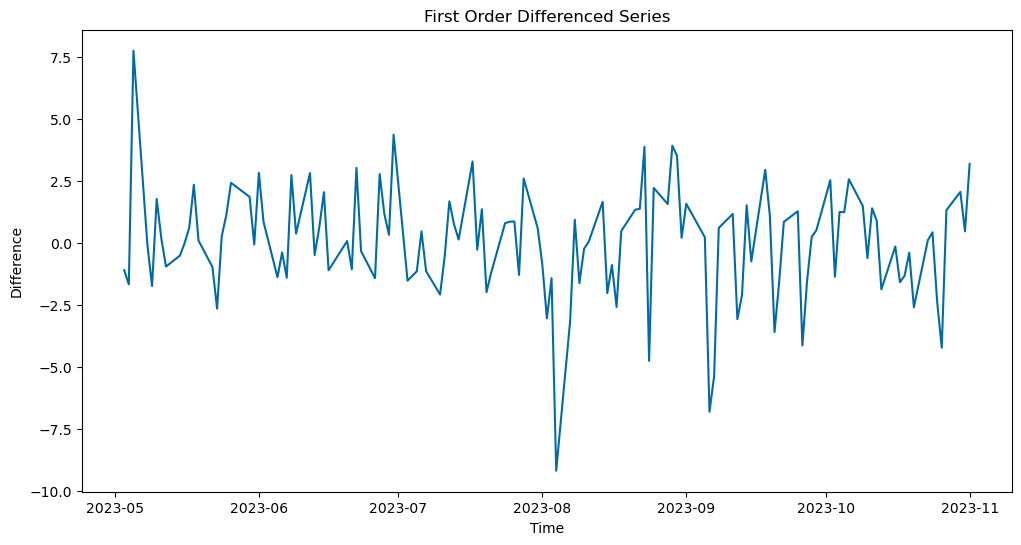

In [7]:
X['Difference'] = X.diff()
plt.figure(figsize=(12,6))
plt.plot(X['Difference'])
plt.title('First Order Differenced Series')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.show()

In [8]:
result = adfuller(X.Difference.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print(result[4])

ADF Statistic: -9.675769
p-value: 0.000000
Critical Values:
{'1%': -3.4833462346078936, '5%': -2.8847655969877666, '10%': -2.5791564575459813}


(ADF) P-value < .05; therefore, AAPL price series is a difference-stationary series.

In [9]:
aapl.options

('2023-11-03',
 '2023-11-10',
 '2023-11-17',
 '2023-11-24',
 '2023-12-01',
 '2023-12-08',
 '2023-12-15',
 '2024-01-19',
 '2024-02-16',
 '2024-03-15',
 '2024-04-19',
 '2024-06-21',
 '2024-09-20',
 '2024-12-20',
 '2025-01-17',
 '2025-06-20',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16')

In [10]:
opt_df = aapl.option_chain('2023-11-10')
call = opt_df.calls
put = opt_df.puts
put

contractSymbol             lastTradeDate  strike  lastPrice  bid  \
0   AAPL231110P00050000 2023-10-30 17:50:05+00:00    50.0       0.01  0.0   
1   AAPL231110P00080000 2023-10-02 16:00:59+00:00    80.0       0.02  0.0   
2   AAPL231110P00095000 2023-10-13 18:32:20+00:00    95.0       0.02  0.0   
3   AAPL231110P00100000 2023-10-27 18:02:21+00:00   100.0       0.01  0.0   
4   AAPL231110P00105000 2023-10-30 15:27:32+00:00   105.0       0.01  0.0   
5   AAPL231110P00110000 2023-11-01 18:28:38+00:00   110.0       0.01  0.0   
6   AAPL231110P00115000 2023-10-31 17:51:07+00:00   115.0       0.01  0.0   
7   AAPL231110P00120000 2023-11-01 18:41:00+00:00   120.0       0.01  0.0   
8   AAPL231110P00125000 2023-11-01 14:15:56+00:00   125.0       0.01  0.0   
9   AAPL231110P00130000 2023-11-01 18:16:00+00:00   130.0       0.02  0.0   
10  AAPL231110P00135000 2023-11-01 19:37:24+00:00   135.0       0.02  0.0   
11  AAPL231110P00138000 2023-11-01 19:56:03+00:00   138.0       0.03  NaN   
12  AAPL231110P00139000 2023-11-01 16:25:49+00:00   139.0       0.05  NaN   
13  AAPL231110P00140000 2023-11-01 18:15:49+00:00   140.0       0.04  0.0   
14  AAPL231110P00141000 2023-11-01 16:54:36+00:00   141.0       0.05  NaN   
15  AAPL231110P00143000 2023-11-01 19:59:05+00:00   143.0       0.04  NaN   
16  AAPL231110P00144000 2023-11-01 15:50:32+00:00   144.0       0.07  NaN   
17  AAPL231110P00145000 2023-11-01 19:50:03+00:00   145.0       0.07  0.0   
18  AAPL231110P00146000 2023-11-01 19:31:53+00:00   146.0       0.07  0.0   
19  AAPL231110P00147000 2023-11-01 19:45:38+00:00   147.0       0.07  0.0   
20  AAPL231110P00148000 2023-11-01 19:54:03+00:00   148.0       0.09  0.0   
21  AAPL231110P00149000 2023-11-01 19:25:45+00:00   149.0       0.10  0.0   
22  AAPL231110P00150000 2023-11-01 19:59:53+00:00   150.0       0.12  0.0   
23  AAPL231110P00152500 2023-11-01 19:51:26+00:00   152.5       0.17  0.0   
24  AAPL231110P00155000 2023-11-01 19:59:51+00:00   155.0       0.23  0.0   
25  AAPL231110P00157500 2023-11-01 19:59:17+00:00   157.5       0.33  0.0   
26  AAPL231110P00160000 2023-11-01 19:59:59+00:00   160.0       0.49  0.0   
27  AAPL231110P00162500 2023-11-01 19:59:59+00:00   162.5       0.73  0.0   
28  AAPL231110P00165000 2023-11-01 19:59:50+00:00   165.0       1.10  0.0   
29  AAPL231110P00167500 2023-11-01 19:59:30+00:00   167.5       1.60  0.0   
30  AAPL231110P00170000 2023-11-01 19:59:56+00:00   170.0       2.29  0.0   
31  AAPL231110P00172500 2023-11-01 19:59:48+00:00   172.5       3.22  0.0   
32  AAPL231110P00175000 2023-11-01 19:59:54+00:00   175.0       4.26  0.0   
33  AAPL231110P00177500 2023-11-01 19:58:20+00:00   177.5       5.55  0.0   
34  AAPL231110P00180000 2023-11-01 19:59:30+00:00   180.0       7.20  0.0   
35  AAPL231110P00182500 2023-11-01 19:53:33+00:00   182.5       9.10  0.0   
36  AAPL231110P00185000 2023-11-01 18:00:14+00:00   185.0      12.80  0.0   
37  AAPL231110P00187500 2023-10-27 15:33:22+00:00   187.5      19.15  0.0   
38  AAPL231110P00190000 2023-11-01 18:42:15+00:00   190.0      17.70  0.0   
39  AAPL231110P00192500 2023-10-30 17:14:06+00:00   192.5      23.15  0.0   
40  AAPL231110P00195000 2023-11-01 13:46:02+00:00   195.0      24.05  0.0   
41  AAPL231110P00200000 2023-10-25 17:32:17+00:00   200.0      28.90  0.0   
42  AAPL231110P00205000 2023-11-01 15:42:32+00:00   205.0      33.40  0.0   
43  AAPL231110P00212500 2023-10-25 19:54:40+00:00   212.5      41.40  0.0   
44  AAPL231110P00215000 2023-10-19 17:07:26+00:00   215.0      37.37  0.0   
45  AAPL231110P00245000 2023-10-06 17:14:34+00:00   245.0      67.90  0.0   

     ask  change  percentChange  volume  openInterest  impliedVolatility  \
0   0.00    0.00            0.0     NaN           0.0           1.000005   
1   0.01    0.00            0.0     NaN           1.0           1.531252   
2   0.00    0.00            0.0     1.0           0.0           0.500005   
3   0.00    0.00            0.0    14.0           0.0           0.500005   
4   0.00 

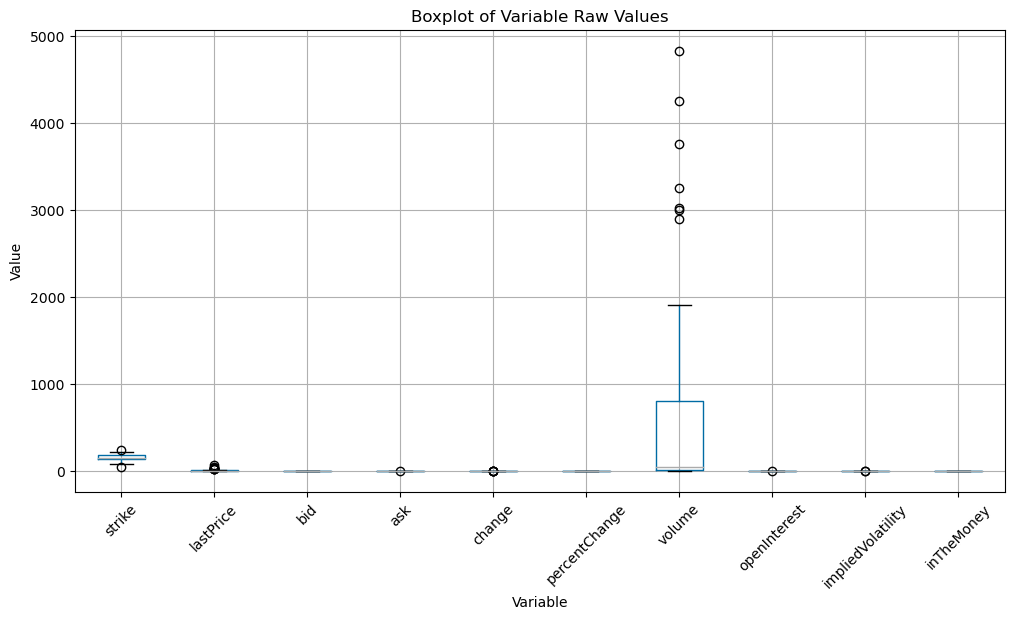

In [11]:
ax = put.boxplot(return_type='axes', rot=45, figsize=(12, 6))
ax.set_xlabel("Variable")
ax.set_ylabel("Value")
ax.set_title("Boxplot of Variable Raw Values")
plt.show()

In [12]:
put.describe()

strike  lastPrice   bid        ask     change  percentChange  \
count   46.000000  46.000000  41.0  41.000000  46.000000           41.0   
mean   154.347826   7.457391   0.0   0.000244   0.005217            0.0   
std     37.417742  14.357082   0.0   0.001562   0.015739            0.0   
min     50.000000   0.010000   0.0   0.000000   0.000000            0.0   
25%    138.250000   0.032500   0.0   0.000000   0.000000            0.0   
50%    151.250000   0.145000   0.0   0.000000   0.000000            0.0   
75%    179.375000   6.787500   0.0   0.000000   0.000000            0.0   
max    245.000000  67.900000   0.0   0.010000   0.070000            0.0   

            volume  openInterest  impliedVolatility  
count    38.000000     41.000000          46.000000  
mean    833.973684      0.024390           0.205510  
std    1401.892784      0.156174           0.299484  
min       1.000000      0.000000           0.000000  
25%      12.500000      0.000000           0.000010  
50%      50.000000      0.000000           0.093759  
75%     798.500000      0.000000           0.250007  
max    4831.000000      1.000000           1.531252

In [13]:
yf.pdr_override()

y_symbols = ['^GSPC', 'ES=F', 'NQ=F', 'YM=F', '^RUT', '^DJT', '^GDAXI', '^N225', '^SSMI', '^STOXX50E', '^FCHI', '^GSPTSE', '^HSI', '000001.SS', '^KS11', '^NSEI', '^AXJO']
stocks = ['^SPX']

In [14]:
startdate = datetime.datetime(2020,3,16)
today = date.today()
enddate = today

In [15]:
indices = web.get_data_yahoo(y_symbols, start=startdate, end=enddate)
stocks = web.get_data_yahoo(stocks, start=startdate, end=enddate)

[*********************100%%**********************]  17 of 17 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
stocks

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-03-16  2508.590088  2562.979980  2380.939941  2386.129883  2386.129883   
2020-03-17  2425.659912  2553.929932  2367.040039  2529.189941  2529.189941   
2020-03-18  2436.500000  2453.570068  2280.520020  2398.100098  2398.100098   
2020-03-19  2393.479980  2466.969971  2319.780029  2409.389893  2409.389893   
2020-03-20  2431.939941  2453.010010  2295.560059  2304.919922  2304.919922   
...                 ...          ...          ...          ...          ...   
2023-10-26  4175.990234  4183.600098  4127.899902  4137.229980  4137.229980   
2023-10-27  4152.930176  4156.700195  4103.779785  4117.370117  4117.370117   
2023-10-30  4139.390137  4177.470215  4132.939941  4166.819824  4166.819824   
2023-10-31  4171.330078  4195.549805  4153.120117  4193.799805  4193.799805   
2023-11-01  4201.270020  4245.640137  4197.740234  4237.859863  4237.859863   

                Volume  
Date                    
2020-03-16  7805450000  
2020-03-17  8370250000  
2020-03-18  8799300000  
2020-03-19  7956100000  
2020-03-20  9053950000  
...                ...  
2023-10-26  4277640000  
2023-10-27  4019500000  
2023-10-30  3911140000  
2023-10-31  4249470000  
2023-11-01  4224900000  

[916 rows x 6 columns]

In [17]:
aapl.history(period='1mo')

Open        High         Low       Close  \
Date                                                                        
2023-10-02 00:00:00-04:00  171.220001  174.300003  170.929993  173.750000   
2023-10-03 00:00:00-04:00  172.259995  173.630005  170.820007  172.399994   
2023-10-04 00:00:00-04:00  171.089996  174.210007  170.970001  173.660004   
2023-10-05 00:00:00-04:00  173.789993  175.449997  172.679993  174.910004   
2023-10-06 00:00:00-04:00  173.800003  177.990005  173.179993  177.490005   
2023-10-09 00:00:00-04:00  176.809998  179.050003  175.800003  178.990005   
2023-10-10 00:00:00-04:00  178.100006  179.720001  177.949997  178.389999   
2023-10-11 00:00:00-04:00  178.199997  179.850006  177.600006  179.800003   
2023-10-12 00:00:00-04:00  180.070007  182.339996  179.039993  180.710007   
2023-10-13 00:00:00-04:00  181.419998  181.929993  178.139999  178.850006   
2023-10-16 00:00:00-04:00  176.750000  179.080002  176.509995  178.720001   
2023-10-17 00:00:00-04:00  176.649994  178.419998  174.800003  177.149994   
2023-10-18 00:00:00-04:00  175.580002  177.580002  175.110001  175.839996   
2023-10-19 00:00:00-04:00  176.039993  177.839996  175.190002  175.460007   
2023-10-20 00:00:00-04:00  175.309998  175.419998  172.639999  172.880005   
2023-10-23 00:00:00-04:00  170.910004  174.009995  169.929993  173.000000   
2023-10-24 00:00:00-04:00  173.050003  173.669998  171.449997  173.440002   
2023-10-25 00:00:00-04:00  171.880005  173.059998  170.649994  171.100006   
2023-10-26 00:00:00-04:00  170.369995  171.380005  165.669998  166.889999   
2023-10-27 00:00:00-04:00  166.910004  168.960007  166.830002  168.220001   
2023-10-30 00:00:00-04:00  169.020004  171.169998  168.869995  170.289993   
2023-10-31 00:00:00-04:00  169.350006  170.899994  167.899994  170.770004   
2023-11-01 00:00:00-04:00  171.000000  174.229996  170.119995  173.970001   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-10-02 00:00:00-04:00  52164500        0.0           0.0  
2023-10-03 00:00:00-04:00  49594600        0.0           0.0  
2023-10-04 00:00:00-04:00  53020300        0.0           0.0  
2023-10-05 00:00:00-04:00  48527900        0.0           0.0  
2023-10-06 00:00:00-04:00  57224100        0.0           0.0  
2023-10-09 00:00:00-04:00  42390800        0.0           0.0  
2023-10-10 00:00:00-04:00  43698000        0.0           0.0  
2023-10-11 00:00:00-04:00  47551100        0.0           0.0  
2023-10-12 00:00:00-04:00  56743100        0.0           0.0  
2023-10-13 00:00:00-04:00  51427100        0.0           0.0  
2023-10-16 00:00:00-04:00  52517000        0.0           0.0  
2023-10-17 00:00:00-04:00  57549400        0.0           0.0  
2023-10-18 00:00:00-04:00  54764400        0.0           0.0  
2023-10-19 00:00:00-04:00  59302900        0.0           0.0  
2023-10-20 00:00:00-04:00  64189300        0.0           0.0  
2023-10-23 00:00:00-04:00  55980100        0.0           0.0  
2023-10-24 00:00:00-04:00  43816600        0.0           0.0  
2023-10-25 00:00:00-04:00  57157000        0.0           0.0  
2023-10-26 00:00:00-04:00  70625300        0.0           0.0  
2023-10-27 00:00:00-04:00  58499100        0.0           0.0  
2023-10-30 00:00:00-04:00  51131000        0.0           0.0  
2023-10-31 00:00:00-04:00  44846000        0.0           0.0  
2023-11-01 00:00:00-04:00  56835700        0.0           0.0

In [18]:
aapl.get_shares_full(start="2022-01-01", end=None)

2022-01-10 00:00:00-05:00    16334399488
2022-01-31 00:00:00-05:00    16319399936
2022-02-04 00:00:00-05:00    16319399936
2022-02-05 00:00:00-05:00    16319399936
2022-02-11 00:00:00-05:00    16319399936
                                ...     
2023-10-20 00:00:00-04:00    15634199552
2023-10-20 00:00:00-04:00    15668100096
2023-10-22 00:00:00-04:00    15634199552
2023-10-27 00:00:00-04:00    15634199552
2023-10-28 00:00:00-04:00    15634199552
Length: 77, dtype: int64

In [19]:
aapl.income_stmt

2022-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                        0.162045   
Normalized EBITDA                                   130541000000.0   
Net Income From Continuing Operation Net Minori...   99803000000.0   
Reconciled Depreciation                              11104000000.0   
Reconciled Cost Of Revenue                          223546000000.0   
EBITDA                                              130541000000.0   
EBIT                                                119437000000.0   
Net Interest Income                                   -106000000.0   
Interest Expense                                      2931000000.0   
Interest Income                                       2825000000.0   
Normalized Income                                    99803000000.0   
Net Income From Continuing And Discontinued Ope...   99803000000.0   
Total Expenses                                      274891000000.0   
Total Operating Income As Reported                  119437000000.0   
Diluted Average Shares                               16325819000.0   
Basic Average Shares                                 16215963000.0   
Diluted EPS                                                   6.11   
Basic EPS                                                     6.15   
Diluted NI Availto Com Stockholders                  99803000000.0   
Net Income Common Stockholders                       99803000000.0   
Net Income                                           99803000000.0   
Net Income Including Noncontrolling Interests        99803000000.0   
Net Income Continuous Operations                     99803000000.0   
Tax Provision                                        19300000000.0   
Pretax Income                                       119103000000.0   
Other Income Expense                                  -334000000.0   
Other Non Operating Income Expenses                   -334000000.0   
Net Non Operating Interest Income Expense             -106000000.0   
Interest Expense Non Operating                        2931000000.0   
Interest Income Non Operating                         2825000000.0   
Operating Income                                    119437000000.0   
Operating Expense                                    51345000000.0   
Research And Development                             26251000000.0   
Selling General And Administration                   25094000000.0   
Gross Profit                                        170782000000.0   
Cost Of Revenue                                     223546000000.0   
Total Revenue                                       394328000000.0   
Operating Revenue                                   394328000000.0   

                                                        2021-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                        0.133023   
Normalized EBITDA                                   120233000000.0   
Net Income From Continuing Operation Net Minori...   94680000000.0   
Reconciled Depreciation                              11284000000.0   
Reconciled Cost Of Revenue                          212981000000.0   
EBITDA                                              120233000000.0   
EBIT                                                108949000000.0   
Net Interest Income                                    198000000.0   
Interest Expense                                      2645000000.0   
Interest Income                                       2843000000.0   
Normalized Income                                    94680000000.0   
Net Income From Continuing And Discontinued Ope...   94680000000.0   
Total Expenses                                      256868000000.0   
Total Operating Income As Reported                  108949000000.0   
Diluted Average Shares                               16864919000.0   
Basic Average Shares                                 16701272000.

In [20]:
aapl.quarterly_income_stmt

2023-06-30  \
Tax Effect Of Unusual Items                                   0.0   
Tax Rate For Calcs                                       0.125456   
Normalized EBITDA                                   26050000000.0   
Net Income From Continuing Operation Net Minori...  19881000000.0   
Reconciled Depreciation                              3052000000.0   
Reconciled Cost Of Revenue                          45384000000.0   
EBITDA                                              26050000000.0   
EBIT                                                22998000000.0   
Net Interest Income                                   -18000000.0   
Interest Expense                                      998000000.0   
Interest Income                                       980000000.0   
Normalized Income                                   19881000000.0   
Net Income From Continuing And Discontinued Ope...  19881000000.0   
Total Expenses                                      58799000000.0   
Total Operating Income As Reported                  22998000000.0   
Diluted Average Shares                              15775021000.0   
Basic Average Shares                                15697614000.0   
Diluted EPS                                                  1.26   
Basic EPS                                                    1.27   
Diluted NI Availto Com Stockholders                 19881000000.0   
Net Income Common Stockholders                      19881000000.0   
Net Income                                          19881000000.0   
Net Income Including Noncontrolling Interests       19881000000.0   
Net Income Continuous Operations                    19881000000.0   
Tax Provision                                        2852000000.0   
Pretax Income                                       22733000000.0   
Other Income Expense                                 -265000000.0   
Other Non Operating Income Expenses                  -265000000.0   
Net Non Operating Interest Income Expense             -18000000.0   
Interest Expense Non Operating                        998000000.0   
Interest Income Non Operating                         980000000.0   
Operating Income                                    22998000000.0   
Operating Expense                                   13415000000.0   
Research And Development                             7442000000.0   
Selling General And Administration                   5973000000.0   
Gross Profit                                        36413000000.0   
Cost Of Revenue                                     45384000000.0   
Total Revenue                                       81797000000.0   
Operating Revenue                                   81797000000.0   

                                                       2023-03-31  \
Tax Effect Of Unusual Items                                   0.0   
Tax Rate For Calcs                                       0.148756   
Normalized EBITDA                                   31216000000.0   
Net Income From Continuing Operation Net Minori...  24160000000.0   
Reconciled Depreciation                              2898000000.0   
Reconciled Cost Of Revenue                          52860000000.0   
EBITDA                                              31216000000.0   
EBIT                                                28318000000.0   
Net Interest Income                                   -12000000.0   
Interest Expense                                      930000000.0   
Interest Income                                       918000000.0   
Normalized Income                                   24160000000.0   
Net Income From Continuing And Discontinued Ope...  24160000000.0   
Total Expenses                                      66518000000.0   
Total Operating Income As Reported                  28318000000.0   
Diluted Average Shares                              15847050000.0   
Basic Average Shares                                15787154000.0   
Diluted EPS                                         

In [21]:
aapl.balance_sheet

2022-09-30  \
Ordinary Shares Number                               15943425000.0   
Share Issued                                         15943425000.0   
Net Debt                                             96423000000.0   
Total Debt                                          120069000000.0   
Tangible Book Value                                  50672000000.0   
Invested Capital                                    170741000000.0   
Working Capital                                     -18577000000.0   
Net Tangible Assets                                  50672000000.0   
Common Stock Equity                                  50672000000.0   
Total Capitalization                                149631000000.0   
Total Equity Gross Minority Interest                 50672000000.0   
Stockholders Equity                                  50672000000.0   
Gains Losses Not Affecting Retained Earnings        -11109000000.0   
Retained Earnings                                    -3068000000.0   
Capital Stock                                        64849000000.0   
Common Stock                                         64849000000.0   
Total Liabilities Net Minority Interest             302083000000.0   
Total Non Current Liabilities Net Minority Inte...  148101000000.0   
Other Non Current Liabilities                        49142000000.0   
Tradeand Other Payables Non Current                  16657000000.0   
Long Term Debt And Capital Lease Obligation          98959000000.0   
Long Term Debt                                       98959000000.0   
Current Liabilities                                 153982000000.0   
Other Current Liabilities                            60845000000.0   
Current Deferred Liabilities                          7912000000.0   
Current Deferred Revenue                              7912000000.0   
Current Debt And Capital Lease Obligation            21110000000.0   
Current Debt                                         21110000000.0   
Other Current Borrowings                             11128000000.0   
Commercial Paper                                      9982000000.0   
Payables And Accrued Expenses                        64115000000.0   
Payables                                             64115000000.0   
Accounts Payable                                     64115000000.0   
Total Assets                                        352755000000.0   
Total Non Current Assets                            217350000000.0   
Other Non Current Assets                             54428000000.0   
Investments And Advances                            120805000000.0   
Other Investments                                   120805000000.0   
Investmentin Financial Assets                       120805000000.0   
Available For Sale Securities                       120805000000.0   
Net PPE                                              42117000000.0   
Accumulated Depreciation                            -72340000000.0   
Gross PPE                                           114457000000.0   
Leases                                               11271000000.0   
Machinery Furniture Equipment                        81060000000.0   
Land And Improvements                                22126000000.0   
Properties                                                     0.0   
Current Assets                                      135405000000.0   
Other Current Assets                                 21223000000.0   
Inventory                                             4946000000.0   
Receivables                                          60932000000.0   
Other Receivables                                    32748000000.0   
Accounts Receivable                                  28184000000.0   
Cash Cash Equivalents And Short Term Investments     48304000000.0   
Other Short Term Investments                         24658000000.0   
Cash And Cash Equivalents                            23646000000.0   
Cash Equivalents                                      5100000000.0

In [22]:
aapl.quarterly_cashflow

2023-06-30     2023-03-31  \
Free Cash Flow                                  24287000000.0  25644000000.0   
Repurchase Of Capital Stock                    -17478000000.0 -19594000000.0   
Repayment Of Debt                               -7500000000.0   5964000000.0   
Issuance Of Debt                                          NaN            NaN   
Capital Expenditure                             -2093000000.0  -2916000000.0   
Interest Paid Supplemental Data                   717000000.0   1170000000.0   
Income Tax Paid Supplemental Data                2126000000.0   4066000000.0   
End Cash Position                               29898000000.0  27129000000.0   
Beginning Cash Position                         27129000000.0  21974000000.0   
Changes In Cash                                  2769000000.0   5155000000.0   
Financing Cash Flow                            -24048000000.0 -25724000000.0   
Cash Flow From Continuing Financing Activities -24048000000.0 -25724000000.0   
Net Other Financing Charges                     -2438000000.0   -484000000.0   
Cash Dividends Paid                             -3849000000.0  -3650000000.0   
Common Stock Dividend Paid                      -3849000000.0  -3650000000.0   
Net Common Stock Issuance                      -17478000000.0 -19594000000.0   
Common Stock Payments                          -17478000000.0 -19594000000.0   
Net Issuance Payments Of Debt                    -283000000.0  -1996000000.0   
Net Short Term Debt Issuance                     1989000000.0    254000000.0   
Short Term Debt Payments                                  NaN            NaN   
Short Term Debt Issuance                                  NaN            NaN   
Net Long Term Debt Issuance                     -2272000000.0  -2250000000.0   
Long Term Debt Payments                         -7500000000.0  -2250000000.0   
Long Term Debt Issuance                                   NaN            NaN   
Investing Cash Flow                               437000000.0   2319000000.0   
Cash Flow From Continuing Investing Activities    437000000.0   2319000000.0   
Net Other Investing Changes                      -506000000.0   -106000000.0   
Net Investment Purchase And Sale                 3036000000.0   5341000000.0   
Sale Of Investment                              12795000000.0  11385000000.0   
Purchase Of Investment                          -9759000000.0  -6044000000.0   
Net Business Purchase And Sale                            NaN            NaN   
Purchase Of Business                                      NaN            NaN   
Net PPE Purchase And Sale                       -2093000000.0  -2916000000.0   
Purchase Of PPE                                 -2093000000.0  -2916000000.0   
Operating Cash Flow                             26380000000.0  28560000000.0   
Cash Flow From Continuing Operating Activities  26380000000.0  28560000000.0   
Change In Working Capital                         749000000.0    231000000.0   
Change In Other Working Capital                           NaN            NaN   
Change In Other Current Liabilities              1229000000.0  -2001000000.0   
Change In Other Current Assets                   -771000000.0      7000000.0   
Change In Payables And Accrued Expense           3974000000.0 -14689000000.0   
Change In Payable                                3974000000.0 -14689000000.0   
Change In Account Payable                        3974000000.0 -14689000000.0   
Change In Inventory                               -22000000.0   -741000000.0   
Change In Receivables                           -3661000000.0  17786000000.0   
Changes In Account Receivables                  -1987000000.0   5321000000.0   
Other Non Cash Items                               81000000.0  -1415000000.0   
Stock Based Compensation                         2617000000.0   2686000000.0   
Deferred Tax                                              NaN            NaN   
Deferred Income Tax                                

In [23]:
aapl.major_holders

0                                      1
0   0.07%        % of Shares Held by All Insider
1  61.32%       % of Shares Held by Institutions
2  61.36%        % of Float Held by Institutions
3    5762  Number of Institutions Holding Shares

In [24]:
aapl.institutional_holders

Holder      Shares Date Reported   % Out  \
0                 Vanguard Group Inc  1303688506    2023-06-29  0.0834   
1                     Blackrock Inc.  1039640859    2023-06-29  0.0665   
2            Berkshire Hathaway, Inc   915560382    2023-06-29  0.0586   
3           State Street Corporation   578897858    2023-06-29  0.0370   
4                           FMR, LLC   307066638    2023-06-29  0.0196   
5      Geode Capital Management, LLC   291538165    2023-06-29  0.0186   
6      Price (T.Rowe) Associates Inc   226650943    2023-06-29  0.0145   
7                     Morgan Stanley   204714950    2023-06-29  0.0131   
8  Norges Bank Investment Management   167374278    2022-12-30  0.0107   
9         Northern Trust Corporation   164536073    2023-06-29  0.0105   

          Value  
0  226802690980  
1  180866321509  
2  159280040774  
3  100710861062  
4   53420383387  
5   50718894920  
6   39430464830  
7   35614260101  
8   29118103347  
9   28624340820

In [25]:
aapl.mutualfund_holders

Holder     Shares Date Reported  \
0             Vanguard Total Stock Market Index Fund  465990265    2023-06-29   
1                            Vanguard 500 Index Fund  352024182    2023-06-29   
2                            Fidelity 500 Index Fund  169378703    2023-08-30   
3                             SPDR S&P 500 ETF Trust  165192563    2023-09-29   
4                           iShares Core S&P 500 ETF  138984763    2023-09-29   
5                         Vanguard Growth Index Fund  127130805    2023-06-29   
6        Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF  124293053    2023-08-30   
7  Vanguard Institutional Index Fund-Institutiona...  100926716    2023-06-29   
8         Vanguard Information Technology Index Fund   76972129    2023-08-30   
9                 Select Sector SPDR Fund-Technology   64568089    2023-09-29   

    % Out        Value  
0  0.0298  81068326970  
1  0.0225  61241647372  
2  0.0108  29466813167  
3  0.0106  28738550386  
4  0.0089  24179179388  
5  0.0081  22116946301  
6  0.0080  21623262582  
7  0.0065  17558220905  
8  0.0049  13390841376  
9  0.0041  11232910522

In [26]:
aapl.news

[{'uuid': '56f79aad-15cb-31e1-bf3c-5b2b314f388e',
  'title': 'AI Is About to Remake the PC. These 2 Stocks Could Be Big Winners.',
  'publisher': 'Barrons.com',
  'link': 'https://finance.yahoo.com/m/56f79aad-15cb-31e1-bf3c-5b2b314f388e/ai-is-about-to-remake-the-pc..html',
  'providerPublishTime': 1698902100,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/C6CAou538MEbVr4m4Jle3A--~B/aD02NDA7dz0xMjgwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/Barrons.com/89b563d34d85b6d666f133ff2c539f28',
     'width': 1280,
     'height': 640,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/OsByqYgJuVGKEx8nK57aQQ--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/Barrons.com/89b563d34d85b6d666f133ff2c539f28',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['INTC', 'QCOM', 'AMD', 'AAPL', 'DELL']},
 {'uuid': '6b3e9206-b9ba-3782-829f-de926aa3f7f2',
  'title':

In [ ]:
testing